# Stan

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pystan
import arviz as az
%run ~/.jupyter/config.ipy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# High Level

See:
* Paper introducing stan: http://www.stat.columbia.edu/~gelman/research/published/stan_jebs_2.pdf
* Stan reference guide: http://mc-stan.org/users/documentation/


# Linear regression with stan

In [2]:
model_code = """
// This is a comment in Stan

// data - the input to the Stan program. In this case we need two vectors x and y of length n.
// Stan supports many data types (vector, matrix, etc)
data {
    int N;
    vector[N] x;
    vector[N] y;
}
// parameters - the unknowns that stan needs to estimate
parameters {
    real m;
    real c;
    real<lower=0> sigma;
}
// model - return the log-posterior. In this case as we don't have priors, this is just the log likelihood.
model {
    vector[N] ypred;
    ypred = m * x + c;
    y ~ normal(ypred, sigma); // Calculate the likelihood of the predictions given the uncertainty
}
"""
model0 = pystan.StanModel(model_code=model_code)

In [30]:
# Let's generate some fake data
n = 50
m, c, sigma = 2, 3, 0.1
x = np.linspace(2, 5, num=n)
y = m * x + c
y_w_err = y + np.random.normal(scale=sigma, size=n)

s_data = {
    "N": n,
    "x": x,
    "y": y_w_err,
}

OrderedDict([('m', array(1.99660062)), ('c', array(3.00140693)), ('sigma', array(0.09460379))])


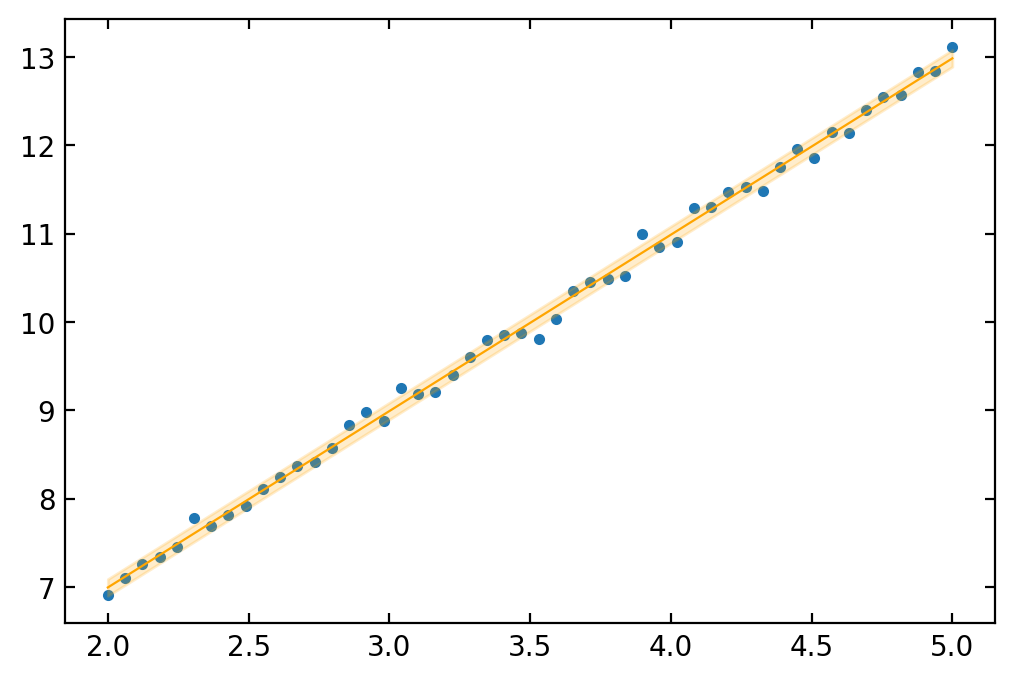

In [40]:
bestfit = model0.optimizing(s_data)

print(bestfit)

_, ax = plt.subplots()
ax.scatter(x, y_w_err)
bf_y = bestfit["m"] * x + bestfit["c"]
ax.plot(x, bf_y, color="orange")
ax.fill_between(x, bf_y + bestfit["sigma"], bf_y - bestfit["sigma"], alpha=0.2, color="orange") 

In [41]:
samples = model0.sampling(s_data)

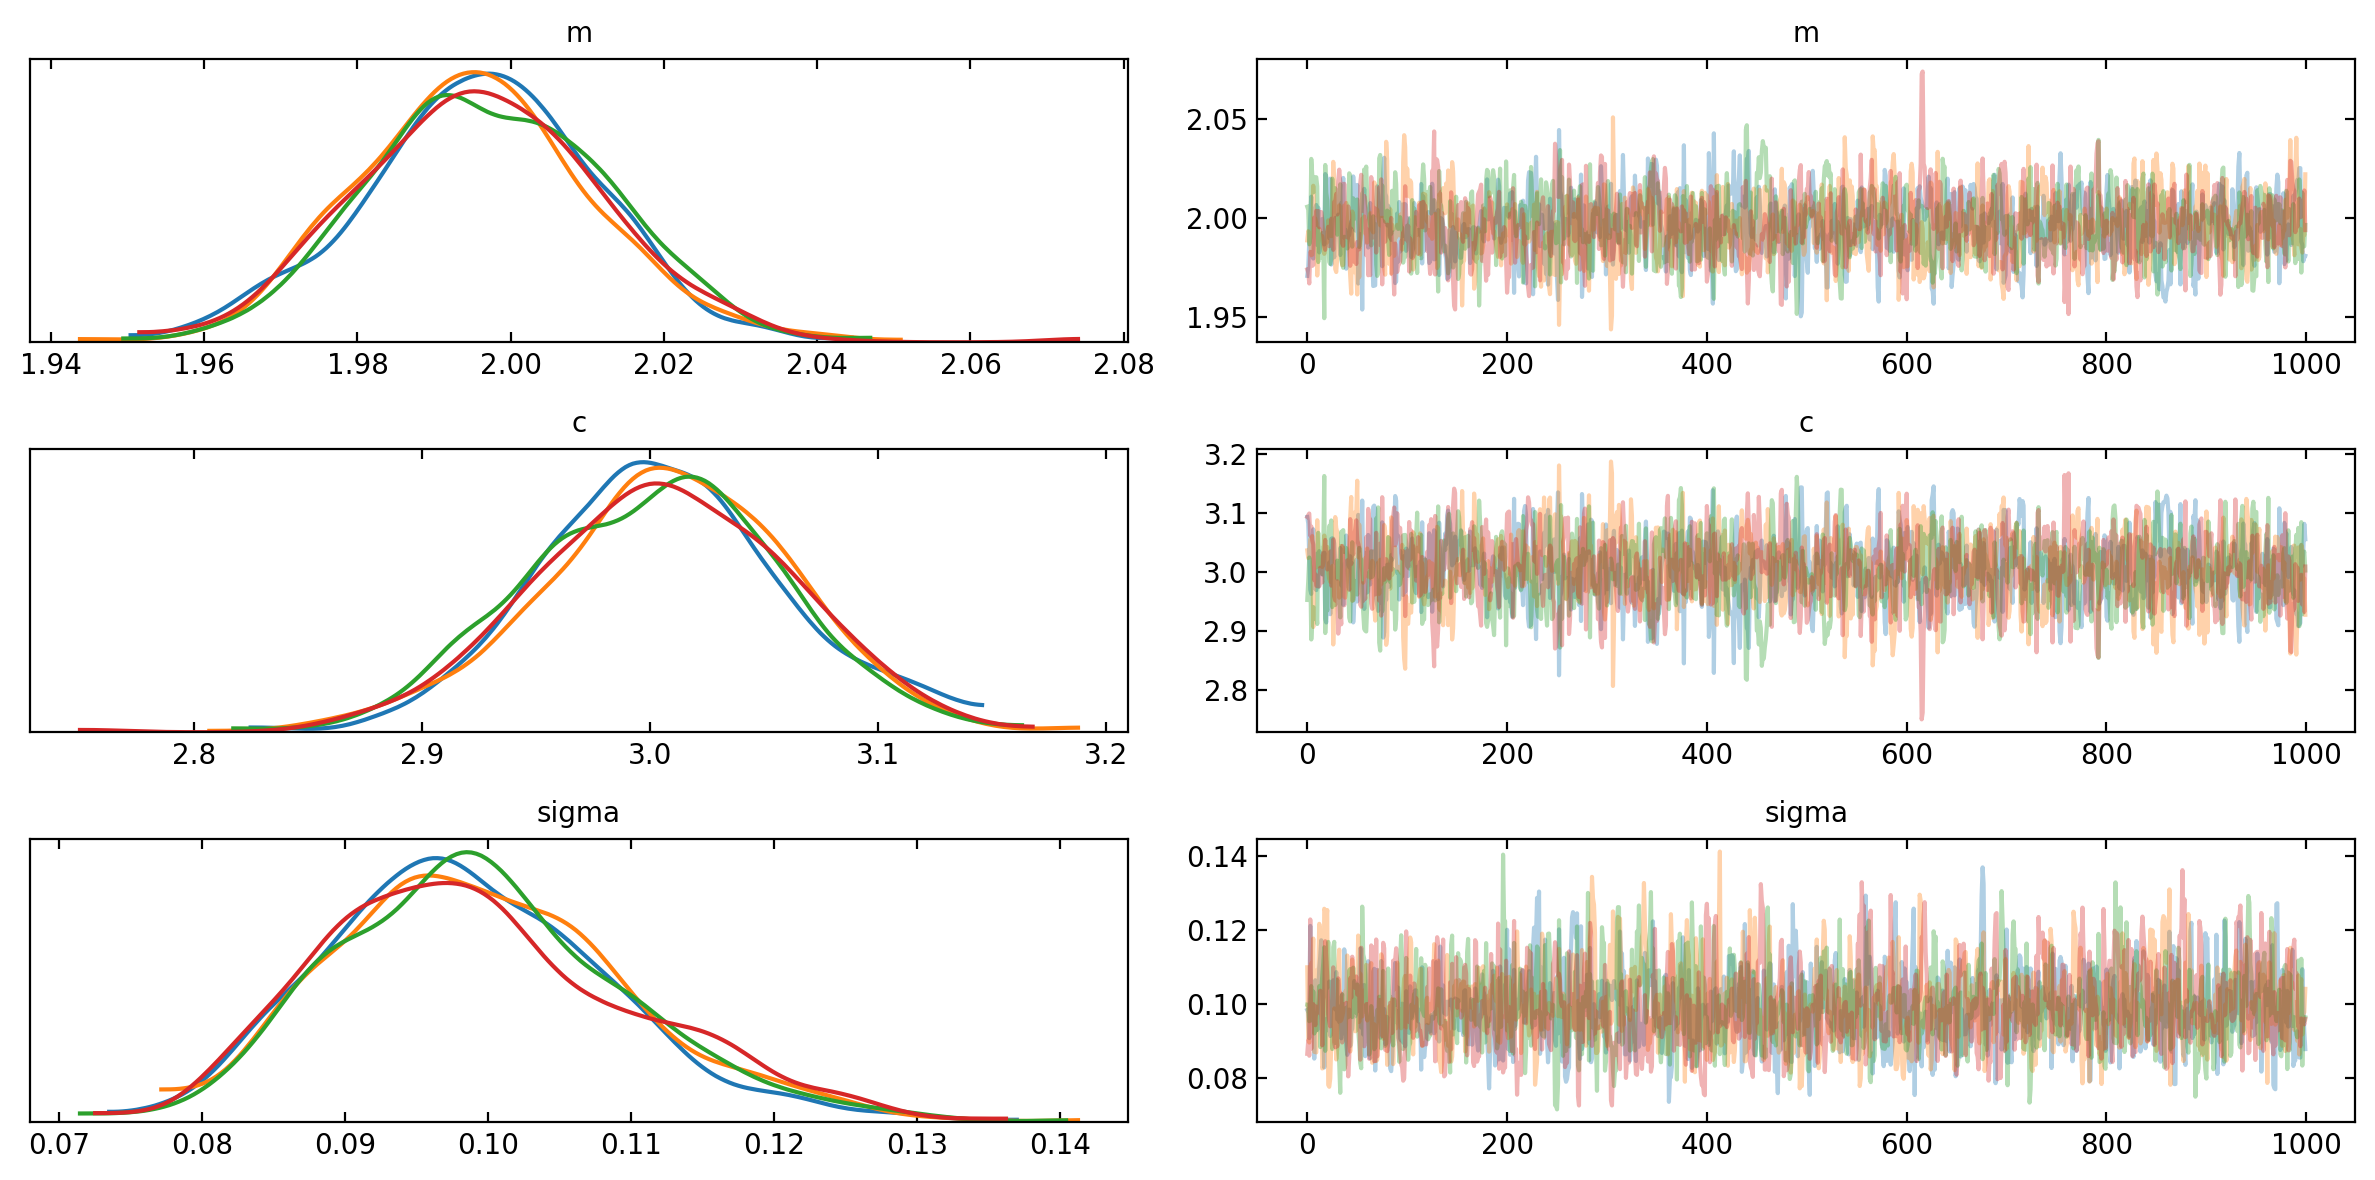

In [53]:
az.plot_trace(samples, var_names=["m", "c", "sigma"]);